## <center> Python Geospatial Data Analysis

### <center>Instructor: Vinita Silaparasetty

### Import Libraries

In [1]:
import pandas as pd
import folium
import math
from folium.plugins import MarkerCluster,HeatMap
import seaborn as sns

### Import Data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/VinitaSilaparasetty/coursera-spatial-data-analysis/master/boston-crime%202.csv')
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Date,Time
0,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)",2019-10-13,09:28:24
1,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)",2019-10-12,20:11:26
2,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)",2019-10-12,15:12:43
3,I192082577,724,Auto Theft,AUTO THEFT,D4,130,NaN,2019-10-12 04:41:52,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)",2019-10-12,04:41:52
4,I192079582,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,NaN,2019-10-02 08:08:49,2019,10,Wednesday,8,Part One,N MEAD ST,42.381846,-71.066551,"(42.38184582, -71.06655134)",2019-10-02,08:08:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,I192078066,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,259,NaN,2019-09-23 16:15:00,2019,9,Monday,16,Part Three,MAGNOLIA ST,42.314784,-71.071610,"(42.31478432, -71.07160997)",2019-09-23,16:15:00
468,I192078065,616,Larceny,LARCENY THEFT OF BICYCLE,D14,759,NaN,2019-09-16 10:00:00,2019,9,Monday,10,Part One,BIGELOW ST,42.351997,-71.167683,"(42.35199741, -71.16768308)",2019-09-16,10:00:00
469,I192078064,3201,Property Lost,PROPERTY - LOST,D4,140,NaN,2019-08-01 09:00:00,2019,8,Thursday,9,Part Three,GLOUCESTER ST,42.350533,-71.084818,"(42.35053286, -71.08481789)",2019-08-01,09:00:00
470,I192078063,3207,Property Found,PROPERTY - FOUND,E5,691,NaN,2019-09-27 13:18:00,2019,9,Friday,13,Part Three,CENTRE ST,42.287094,-71.148221,"(42.28709355, -71.14822128)",2019-09-27,13:18:00


### Generate Base Map

In [3]:
boston = (42.361145,-71.057083)
m = folium.Map(location=boston, tile='Stamen terrain',zoom_start=12)
m

### Mark Crime Scenes

In [4]:
mc = MarkerCluster()
for idx, row in df.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(folium.Marker([row['Lat'],row['Long']]))
        
m.add_child(mc)

### View Districts with Highest Crime Rates

In [5]:
crime = df.groupby(['DISTRICT','STREET','REPORTING_AREA','Lat','Long']).sum().reset_index()
crime

,DISTRICT,STREET,REPORTING_AREA,Lat,Long,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR
0,A1,ARLINGTON ST,128,42.348670,-71.069389,3201,0.0,2019,9,10
1,A1,ATLANTIC AVE,110,42.354009,-71.052853,3831,0.0,2019,9,3
2,A1,ATLANTIC AVE,114,42.354383,-71.052133,2647,0.0,2019,9,15
3,A1,CAUSEWAY ST,75,42.364331,-71.063193,1825,0.0,4038,18,8
4,A1,CAUSEWAY ST,75,42.364975,-71.062044,2405,0.0,2019,9,21
...,...,...,...,...,...,...,...,...,...,...
386,E5,SOUTH ST,676,42.288025,-71.143697,3802,0.0,2019,9,12
387,E5,TOBIN RD,714,42.259006,-71.160679,3301,0.0,2019,9,21
388,E5,TYNDALE ST,672,42.287186,-71.136805,3503,0.0,2019,9,17
389,E5,WALTER ST,663,42.293797,-71.130566,3006,0.0,2019,9,19


In [10]:
crime.update(crime['DISTRICT'].map('District:{}'.format))
crime.update(crime['REPORTING_AREA'].map('Report:{}'.format))

In [11]:
crime

,DISTRICT,STREET,REPORTING_AREA,Lat,Long,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR
0,District:A1,ARLINGTON ST,Report:128,42.348670,-71.069389,3201,0.0,2019,9,10
1,District:A1,ATLANTIC AVE,Report:110,42.354009,-71.052853,3831,0.0,2019,9,3
2,District:A1,ATLANTIC AVE,Report:114,42.354383,-71.052133,2647,0.0,2019,9,15
3,District:A1,CAUSEWAY ST,Report:75,42.364331,-71.063193,1825,0.0,4038,18,8
4,District:A1,CAUSEWAY ST,Report:75,42.364975,-71.062044,2405,0.0,2019,9,21
...,...,...,...,...,...,...,...,...,...,...
386,District:E5,SOUTH ST,Report:676,42.288025,-71.143697,3802,0.0,2019,9,12
387,District:E5,TOBIN RD,Report:714,42.259006,-71.160679,3301,0.0,2019,9,21
388,District:E5,TYNDALE ST,Report:672,42.287186,-71.136805,3503,0.0,2019,9,17
389,District:E5,WALTER ST,Report:663,42.293797,-71.130566,3006,0.0,2019,9,19


In [14]:
m2 = folium.Map(location=boston, tile='stamen', zoom_start=12)
HeatMap(data=crime[['Lat','Long']],radius=15).add_to(m2)
def plotDot(point):
    folium.CircleMarker(location=[point.Lat, point.Long],
                       radius=5, weight=2, popup=[point.DISTRICT,point.REPORTING_AREA],
                       fill_color='#000000').add_to(m2)
crime.apply(plotDot,axis=1)
m2.fit_bounds(m2.get_bounds())
m2
    

### Medical Assistance Analysis

In [16]:
med = df.loc[df.OFFENSE_CODE_GROUP =='Medical Assistance'][['Lat','Long']]
med.Lat.fillna(0, inplace=True)
med.Long.fillna(0, inplace=True)
m6=folium.Map(location=boston, tiles='openstreetmap', zoom_start=11)
HeatMap(data= med,radius=16).add_to(m6)
m6

### Crimes Commited

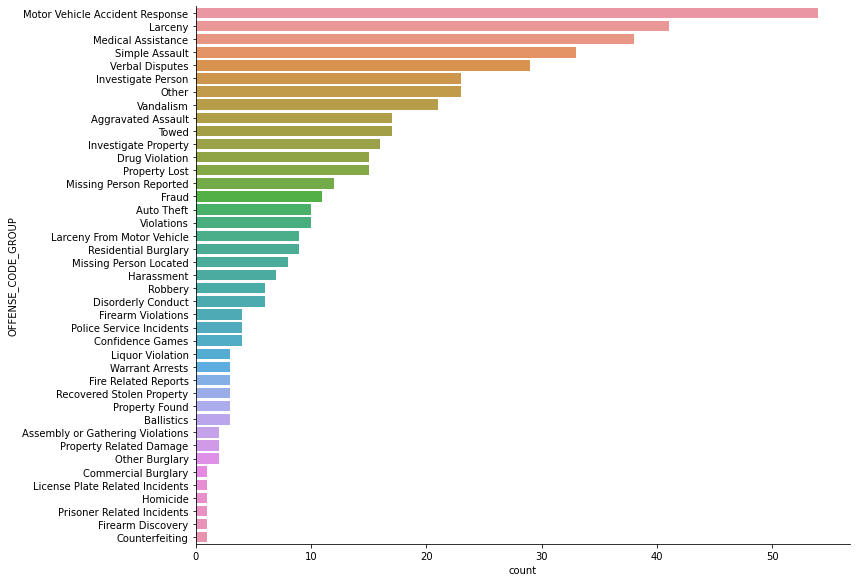

In [27]:
sns.catplot(y='OFFENSE_CODE_GROUP',
            kind='count',
            height=8,
            aspect=1.5,
            order= df.OFFENSE_CODE_GROUP.value_counts().index,
            data=df)

### Motor Vehicle Accident Response

In [31]:
mv = df.loc[df.OFFENSE_CODE_GROUP =='Motor Vehicle Accident Response'][['Lat','Long']]
mv.fillna(0, inplace=True)
mv.Lat.fillna(0, inplace=True)
mv.Long.fillna(0, inplace=True)
m4=folium.Map(location=boston, tiles='openstreetmap', zoom_start=11)
HeatMap(data= med,radius=16).add_to(m4)
m4

### Larceny

In [33]:
lar = df.loc[df.OFFENSE_CODE_GROUP =='Larceny'][['Lat','Long']]
lar.fillna(0, inplace=True)
lar.Lat.fillna(0, inplace=True)
lar.Long.fillna(0, inplace=True)
m5=folium.Map(location=boston, tiles='openstreetmap', zoom_start=11)
HeatMap(data= med,radius=16).add_to(m5)
m5